<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


########################################################################################

"Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'owner-occupied homes')

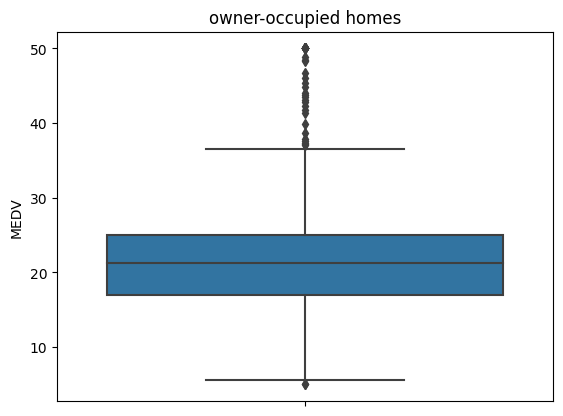

In [5]:
bxplt = sns.boxplot(y = "MEDV", data = boston_df)
bxplt.set_title("owner-occupied homes")

########################################################################################

Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Charles River Variable')

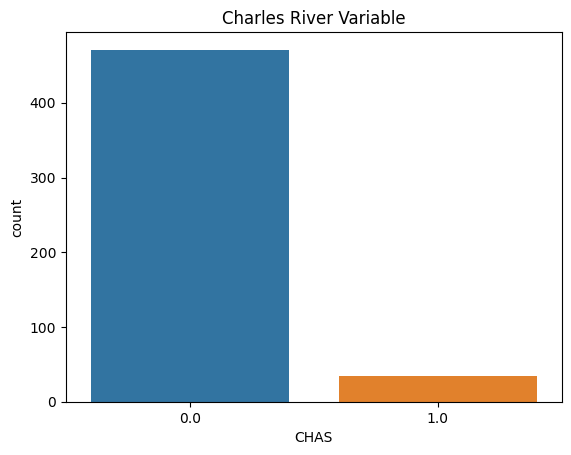

In [6]:
brplt = sns.countplot(x = "CHAS", data = boston_df)
brplt.set_title("Charles River Variable")

########################################################################################

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'MEDV variable vs the AGE variable')

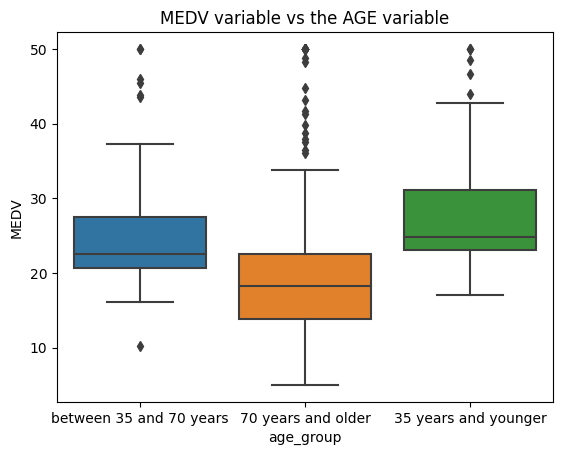

In [7]:
boston_df.loc[(boston_df["AGE"] <= 35), "age_group"] = "35 years and younger"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "age_group"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"] >= 70), "age_group"] = "70 years and older"

bxplt_medv = sns.boxplot(y = "MEDV", x = "age_group", data = boston_df)
bxplt_medv.set_title("MEDV variable vs the AGE variable")

########################################################################################

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Nitric oxide concentration and the proportion of non-retail business acres per town')

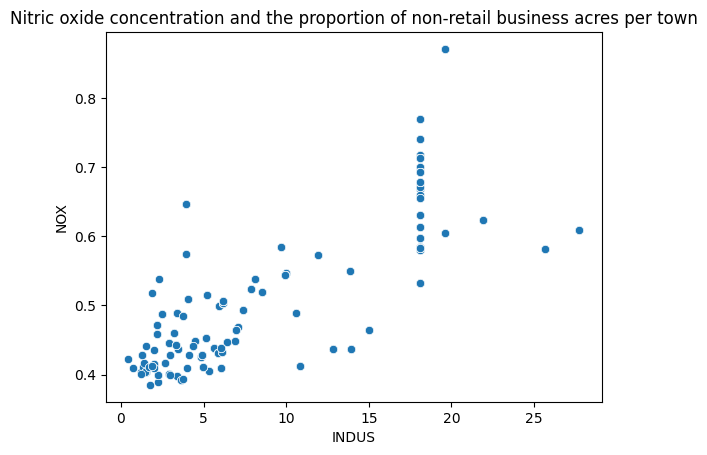

In [8]:
sctplot = sns.scatterplot(y = "NOX", x = "INDUS", data = boston_df)
sctplot.set_title("Nitric oxide concentration and the proportion of non-retail business acres per town")

The NOX levels is positively proportional. High values of non-retail business acres per town produces a high concentration of NOX

########################################################################################

Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'pupil to teacher ratio')

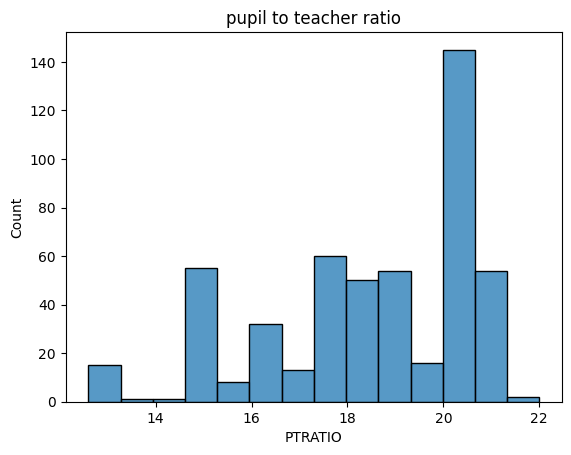

In [9]:
hstplot = sns.histplot(x = "PTRATIO", data = boston_df)
hstplot.set_title("pupil to teacher ratio")

########################################################################################

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypotheses:
    Null Hypothesis -> NO significant difference
    Alternative Hypothesis -> A significant difference

In [10]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = "null_h"
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = "alt_h"

scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'null_h']['MEDV'], 
                      boston_df[boston_df['CHAS_T'] == 'alt_h']['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

With α = 0.05, 
    here pvalue < α, hence there is NO significant difference

########################################################################################

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypotheses:
    Null Hypothesis -> NO difference
    Alternative Hypothesis -> A difference

In [11]:
output = ols("MEDV ~ AGE", data = boston_df).fit()
table = sm.stats.anova_lm(output)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


With α = 0.05, 
    here pvalue > α, hence there is a difference

########################################################################################

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypotheses:
    Null Hypothesis -> NO relationship
    Alternative Hypothesis -> A relationship

In [12]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209189, pvalue=7.913361061211254e-98)

With α = 0.05, 
    here pvalue > α, hence there is a positive relationship

########################################################################################

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [13]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        10:45:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

coef DIS = 1.0916 
    indicates an additional weighted distance to the 5 empolyment centers in boston increases the median value of owner occupied homes